In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('MPA_org_out_2006-2020_annuel.csv')

In [63]:
data = data.rename(columns={'YearSeason': 'Date'})
data.set_index('Date', inplace=True)

In [64]:
data_tot = data['Total']
data.drop(columns=['Total'], inplace=True)

In [65]:
def Shannon(row):
    return -np.sum(row*np.log(row + 1e-10))

In [66]:
data_shannon = data.apply(Shannon, axis=1)

In [67]:
data_shannon = data_shannon / data_shannon.max()

<Axes: xlabel='Date'>

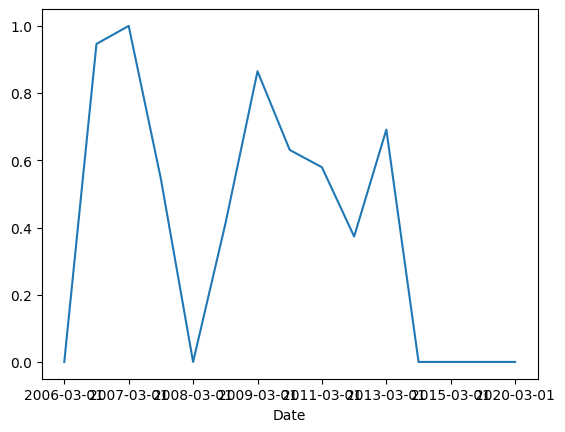

In [68]:
data_shannon.plot()

In [69]:
def pielou(row):
    return Shannon(row)  / np.log2(np.count_nonzero(row))

C:\Users\alexi\AppData\Local\Temp\ipykernel_384052\3118163278.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return Shannon(row)  / np.log2(np.count_nonzero(row))


<Axes: xlabel='Date'>

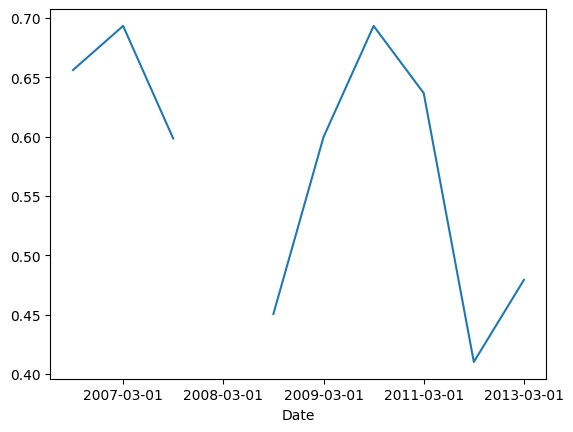

In [70]:
pielou = data.apply(pielou, axis=1)

pielou.plot()

In [71]:
def brillouin(row):
    return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))  

In [72]:
def simpson(row):
    return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))

In [73]:
# multiply each row of data_pmana by the corresponding row of data_pmana_count
data_abs = data.mul(data_tot, axis=0)

In [74]:
# round values to integers
data_abs = data_abs.round(0).astype(int)

In [75]:
brillouin = data_abs.apply(brillouin, axis=1)
simpson = data_abs.apply(simpson, axis=1)

C:\Users\alexi\AppData\Local\Temp\ipykernel_384052\2682157653.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.prod(list(np.math.factorial(elt) for elt in row)) / np.math.factorial(np.sum(row))
C:\Users\alexi\AppData\Local\Temp\ipykernel_384052\1921702351.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))
C:\Users\alexi\AppData\Local\Temp\ipykernel_384052\1921702351.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - np.sum(elt * (elt - 1) for elt in row) / (np.sum(row) * (np.sum(row) - 1))


<Axes: xlabel='Date'>

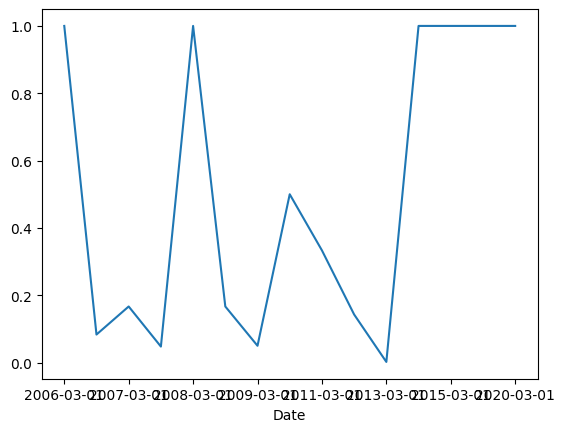

In [76]:
brillouin.plot()

<Axes: xlabel='Date'>

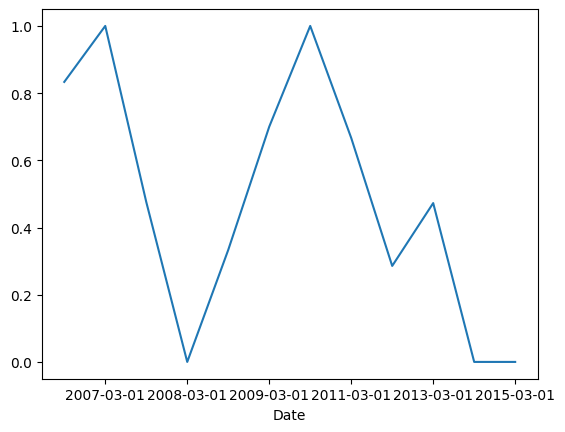

In [77]:
simpson.plot()

<Axes: xlabel='Date'>

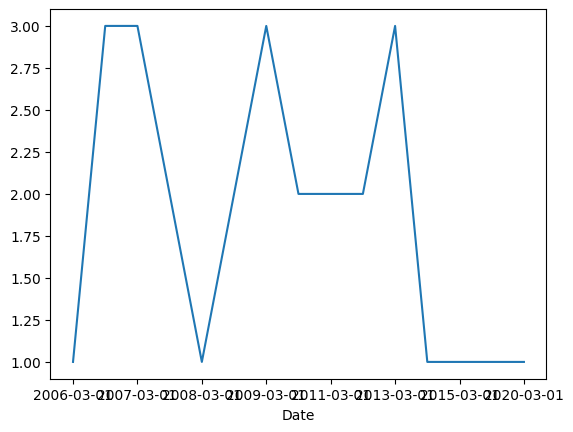

In [78]:
# count non-zero values for each row
data_bool = data_abs.astype(bool).sum(axis=1)
data_bool.plot()


In [79]:
data['Species richness'] = data_bool / data_bool.max()
data['Shannon'] = data_shannon
data['Pielou'] = pielou
data['Brillouin'] = brillouin
data['Simpson'] = simpson

In [80]:
data['Total'] = data_tot

In [81]:
data.to_csv('org_out_indexes.csv')